<a href="https://colab.research.google.com/github/rubaTech/SCAI-Final-trainning/blob/main/Online_Payments_Fraud_Detection_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Online Payments Fraud Detection using ML

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("Transactions (2).csv")

In [12]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [13]:
data.shape

(436601, 11)

In [14]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
436596,18,CASH_IN,218006.91,C872472407,523920.33,741927.24,C599726537,5093629.67,4875622.76,0.0,0.0
436597,18,CASH_IN,163222.92,C1180087809,741927.24,905150.15,C1348807490,6946852.34,6783629.43,0.0,0.0
436598,18,CASH_IN,452022.76,C481355408,905150.15,1357172.91,C2104809432,3404112.29,3489028.04,0.0,0.0
436599,18,CASH_IN,62350.40,C716537186,1357172.91,1419523.31,C1027863744,429115.86,543092.93,0.0,0.0
436600,18,CASH_IN,296893.20,C410907908,1419523.31,1716416.51,NaN,NaN,NaN,NaN,NaN


In [15]:
# Check for null values
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [19]:
data = data.drop(index=436600)
# Check for null values
data.isnull().sum()


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 436599 entries, 0 to 436599
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            436599 non-null  int64  
 1   type            436599 non-null  object 
 2   amount          436599 non-null  float64
 3   nameOrig        436599 non-null  object 
 4   oldbalanceOrg   436599 non-null  float64
 5   newbalanceOrig  436599 non-null  float64
 6   nameDest        436599 non-null  object 
 7   oldbalanceDest  436599 non-null  float64
 8   newbalanceDest  436599 non-null  float64
 9   isFraud         436599 non-null  float64
 10  isFlaggedFraud  436599 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 40.0+ MB


In [21]:
data['isFraud'] = data['isFraud'].astype(int)
data['isFlaggedFraud'] = data['isFlaggedFraud'].astype(int)

# Check
print(data.dtypes)


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [22]:

numeric_data = data.select_dtypes(include=['int64', 'float64'])

correlation = numeric_data.corr()

print(correlation["isFraud"].sort_values(ascending=False))


isFraud           1.000000
amount            0.045840
oldbalanceOrg    -0.001257
newbalanceDest   -0.002174
oldbalanceDest   -0.005298
newbalanceOrig   -0.006733
step             -0.022223
isFlaggedFraud         NaN
Name: isFraud, dtype: float64


In [23]:
print(data['isFlaggedFraud'].value_counts())


isFlaggedFraud
0    436599
Name: count, dtype: int64


In [24]:

data.drop(columns=['isFlaggedFraud'], inplace=True)

#Transaction type
data.type.value_counts()

,count
type,
CASH_OUT,157927
PAYMENT,144891
CASH_IN,94794
TRANSFER,35896
DEBIT,3091


In [25]:
# Distribution of Transaction Types
type=data["type"].value_counts()
transaction=type.index
quantity=type.values

import plotly.express as px
figure=px.pie(data,values=quantity,names=transaction,hole=0.5,title="Distribution of Transaction Types")
figure.show()




In [26]:
#Transform categorical features into numerical
data["type"]=data["type"].replace({"CASH_OUT":1,"PAYMENT":2,"CASH_IN":3
                                   , "TRANSFER":4,"DEBIT":5})

/tmp/ipython-input-2258091386.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [27]:
#Transform the values of the isFraud column
data["isFraud"]=data["isFraud"].replace({0:"No Fraud",1:"Fraud"})

In [28]:
data.tail(500)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
436100,18,1,125169.00,C1113556683,0.00,0.00,C1531863511,128743.58,259112.55,No Fraud
436101,18,1,279612.12,C1140437065,0.00,0.00,C153257599,431036.88,710649.00,No Fraud
436102,18,1,251932.46,C2088984140,0.00,0.00,C954697228,5883935.37,7207875.72,No Fraud
436103,18,1,27156.44,C1626038355,0.00,0.00,C1750563752,322528.50,349684.94,No Fraud
436104,18,1,481597.51,C1589435227,0.00,0.00,C1599002243,6428925.19,6910522.70,No Fraud
...,...,...,...,...,...,...,...,...,...,...
436595,18,3,112662.60,C1546470367,411257.73,523920.33,C1185339311,1333309.12,1220646.52,No Fraud
436596,18,3,218006.91,C872472407,523920.33,741927.24,C599726537,5093629.67,4875622.76,No Fraud
436597,18,3,163222.92,C1180087809,741927.24,905150.15,C1348807490,6946852.34,6783629.43,No Fraud
436598,18,3,452022.76,C481355408,905150.15,1357172.91,C2104809432,3404112.29,3489028.04,No Fraud


In [29]:
#selecting features and splitting dataset
from sklearn.model_selection import train_test_split

x = np.array(data[["step", "type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data["isFraud"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


model1 = DecisionTreeClassifier()
model2 = LogisticRegression(max_iter=1000)
model3=RandomForestClassifier()
model4=KNeighborsClassifier()
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
# Print the accuracy of different classification models on the test set
print('Decision Tree Classifier :' ,model1.score(x_test,y_test))
print('Logistic Regression :' ,model2.score(x_test,y_test))
print('Random Forest Classifier :' ,model3.score(x_test,y_test))
print('KNeighbors Classifier :' ,model4.score(x_test,y_test))

Decision Tree Classifier : 0.9995648190563445
Logistic Regression : 0.9996335318369217
Random Forest Classifier : 0.9997022446174989
KNeighbors Classifier : 0.9995877233165369


In [32]:
#prediction ["step","type","amount","oldbalanceOrg","newbalanceOrig"]
features=np.array([[4,4,9000.60,9000.60,0.0]])
print(model1.predict(features))
print(model2.predict(features))
print(model3.predict(features))
print(model4.predict(features))

['No Fraud']
['No Fraud']
['No Fraud']
['No Fraud']


In [33]:
#prediction ["step","type","amount","oldbalanceOrg","newbalanceOrig"]
features=np.array([[1,4,181.00,181.00,0]])
print(model1.predict(features))
print(model2.predict(features))
print(model3.predict(features))
print(model4.predict(features))

['Fraud']
['No Fraud']
['Fraud']
['Fraud']


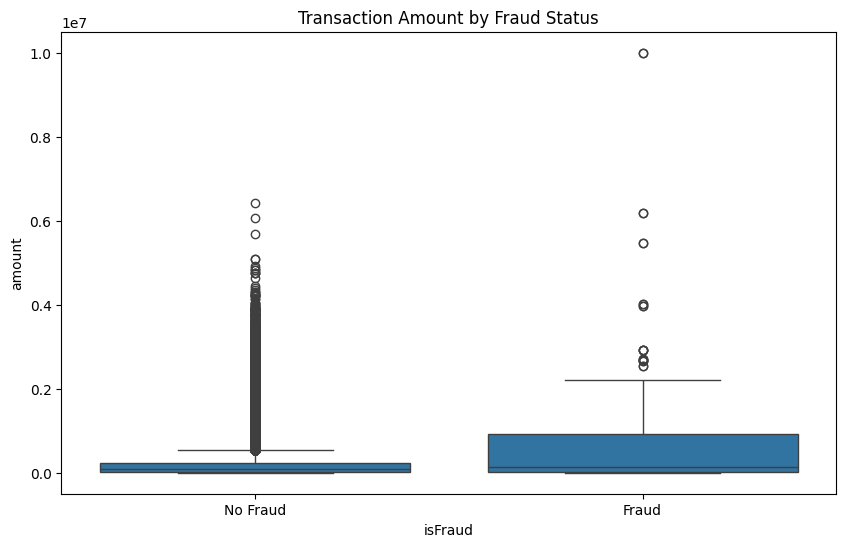

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x="isFraud", y="amount", data=data)
plt.title("Transaction Amount by Fraud Status")
plt.show()